# Principal Component Analysis example

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##### Load the dataset

In [2]:
data = pd.read_csv('../data/California_Real_Estate.csv', sep= ';')
df = data.copy()
df

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
262,5,NaN,NaN,0,NaN,1239,322611,0
263,5,NaN,NaN,0,NaN,795,279191,0
264,5,NaN,NaN,0,NaN,1013,287997,0
265,5,NaN,NaN,0,NaN,1075,365869,0


##### Discarding unsold properties

* Status = 0

In [3]:
df_sold = df[df['Status'] == 1]
df_sold

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
191,1,2005.0,7.0,0,22.0,743,210745,1
192,1,2005.0,7.0,0,28.0,1160,331155,1
193,1,2005.0,7.0,0,34.0,626,204435,1
194,1,2005.0,7.0,0,37.0,756,189194,1


##### Standardizing

* -> Mean 0 , STDEV 1

In [4]:
scaler = StandardScaler()
df_sold_scaled = scaler.fit_transform(df_sold)

In [5]:
df_sold_scaled

array([[-1.26112759, -1.24588876,  1.10629248, ..., -0.6013334 ,
        -0.29104848,  0.        ],
       [-1.26112759, -1.24588876,  0.80955653, ..., -0.55148936,
        -0.28905908,  0.        ],
       [-0.4548329 ,  0.62294438, -0.08065131, ..., -1.19946184,
        -0.75264086,  0.        ],
       ...,
       [-1.26112759, -1.24588876, -0.08065131, ..., -1.04992973,
        -0.81327396,  0.        ],
       [-1.26112759, -1.24588876, -0.08065131, ..., -0.55148936,
        -1.00396922,  0.        ],
       [-1.26112759, -1.24588876, -0.08065131, ..., -1.04992973,
        -0.81837886,  0.        ]])

##### PCA

In [6]:
pca = PCA()
pca.fit_transform(df_sold_scaled)

array([[-0.60734881,  1.31926442,  0.57906783, ..., -0.25542486,
         0.2337479 ,  0.        ],
       [-0.58105774,  1.34289556,  0.32392824, ..., -0.18273758,
         0.199292  ,  0.        ],
       [-1.8398805 , -0.1606641 , -0.29157809, ..., -0.71379278,
         0.2905317 ,  0.        ],
       ...,
       [-1.03970034,  1.18485044, -0.6530342 , ..., -0.00559872,
         0.19757116,  0.        ],
       [-0.76196533,  1.19268984, -0.64690188, ..., -0.00744995,
        -0.28604396,  0.        ],
       [-0.82936359,  1.09937408, -0.7236547 , ..., -0.01692015,
         0.20697981,  0.        ]])

In [9]:
# Returns how much each component explains of the total variance. 
pca.explained_variance_ratio_

array([0.30724715, 0.28117078, 0.15166089, 0.12851171, 0.09233419,
       0.03075947, 0.00831583, 0.        ])

##### Barchart - How much each component explains of the total variance

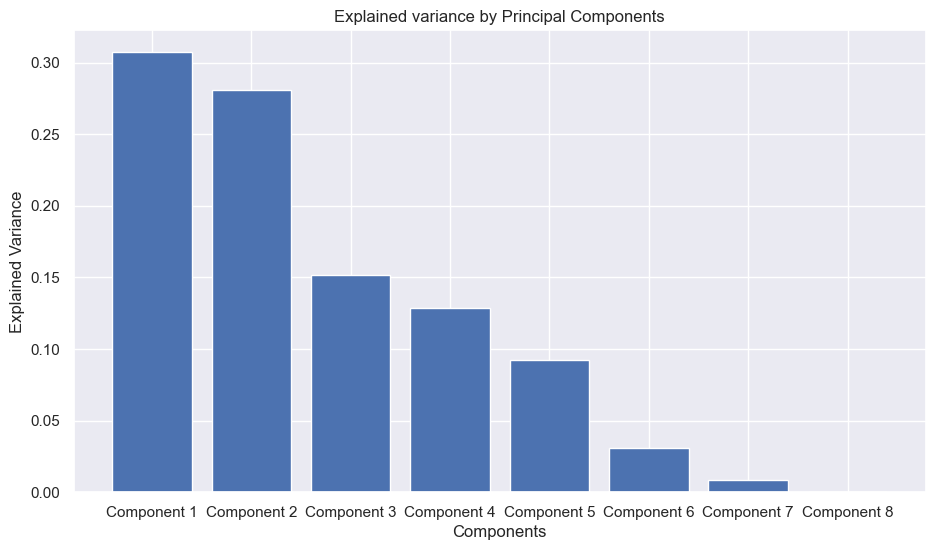

In [12]:
plt.figure(figsize = (11,6))
components = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']
explained_variances = pca.explained_variance_ratio_

plt.bar(components, explained_variances)
plt.title('Explained variance by Principal Components')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

##### Cumulative explained variance until a certain component - Chart

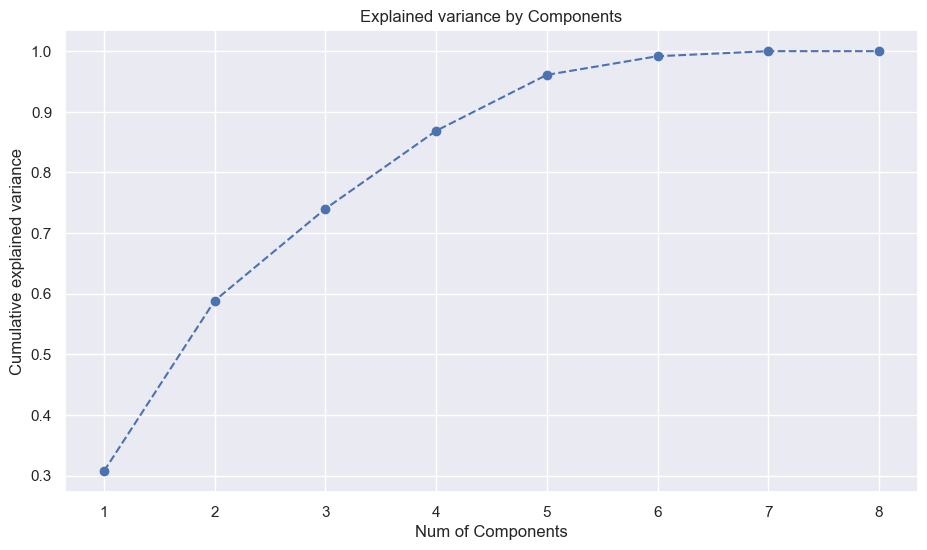

In [13]:
plt.figure(figsize=(11,6))
plt.plot(range(1,9),
         pca.explained_variance_ratio_.cumsum(),
         marker='o',
         linestyle = '--')
plt.title('Explained variance by Components')
plt.xlabel('Num of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

* Good rule of thumb is to retain at least 80% of the total variance.
* -> 4 components looks like a solid num of components